In [100]:
# Text Analytics packages
library(RWeka)
library(tm)
library(wordcloud)

# Suppress warnings
options(warn=-1)

In [92]:
print ("Exploring structure of Chardonnay dataset")
chardonnay_tweets_data <- read.csv("../data/chardonnay_tweets.csv")
str(chardonnay_tweets_data)

cat ("\n")
print ("Exploring structure of Coffee dataset")
tweets <- read.csv("../data/coffee.csv")
str(tweets)

[1] "Exploring structure of Chardonnay dataset"
'data.frame':	1000 obs. of  2 variables:
 $ num   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tweets: Factor w/ 915 levels "!!! @davalyns: whispering* i ship jason and chardonnay SO HARD      ",..: 716 69 267 716 245 198 36 726 17 596 ...

[1] "Exploring structure of Coffee dataset"
'data.frame':	1000 obs. of  13 variables:
 $ num         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ text        : Factor w/ 918 levels "  #Coffee and #Cigarettes https://t.co/o1pUoIvC9t http://t.co/qH51LyPG0d",..: 651 842 772 790 860 708 750 655 845 815 ...
 $ favorited   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSN   : Factor w/ 176 levels "2treyJay","<NA>",..: 107 2 2 2 2 2 2 120 2 2 ...
 $ created     : Factor w/ 13 levels "08/09/13 2:31",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ truncated   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSID  : num  3.66e+17 NA NA NA NA ...
 $ id          : num  3.66e+17 3.66e+17 3.66e+17 3.66e+17 3.66e+17 ...
 $ s

In [93]:
head (chardonnay_tweets_data)

num,tweets
1,"RT @oceanclub: @eilisohanlon @stonyjim @vonprond Eilis, I'm from Pearse St and even I can tell a Chardonnay from so?"
2,?@roystbaggage: 'Go to your Auntie Chardonnay and she will help you piss up against that wall' - the scum of Dover.?what's this even mean ha
3,Big thank you to Ian at Fowles wine for making me a Chardonnay drinker. @LadiesWhoShoot #wrongwayround http://t.co/KiA2StsOEO
4,"RT @oceanclub: @eilisohanlon @stonyjim @vonprond Eilis, I'm from Pearse St and even I can tell a Chardonnay from so?"
5,"After to worst rain at night known, floating flip flops, we have woke to the hottest sun!! #pool #sunshine #Chardonnay #happyhols"
6,"@eilisohanlon @stonyjim @vonprond Eilis, I'm from Pearse St and even I can tell a Chardonnay from something else."


In [94]:
chardonnay_tweets <- chardonnay_tweets_data$tweets
chardonnay_source <- VectorSource(chardonnay_tweets) #Vector Source
text_corp <- VCorpus(chardonnay_source)

In [95]:
tokenizer <- function(x) 
  NGramTokenizer(x, Weka_control(min = 2, max = 2))

# Creating unigram_dtm
unigram_dtm <- DocumentTermMatrix(text_corp)
print (unigram_dtm)

cat ("\n")
# Creating bigram_dtm
bigram_dtm <- DocumentTermMatrix(text_corp, control = list(tokenize = tokenizer))
print (bigram_dtm)

<<DocumentTermMatrix (documents: 1000, terms: 3731)>>
Non-/sparse entries: 10435/3720565
Sparsity           : 100%
Maximal term length: 180
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 1000, terms: 7609)>>
Non-/sparse entries: 13248/7595752
Sparsity           : 100%
Maximal term length: 185
Weighting          : term frequency (tf)


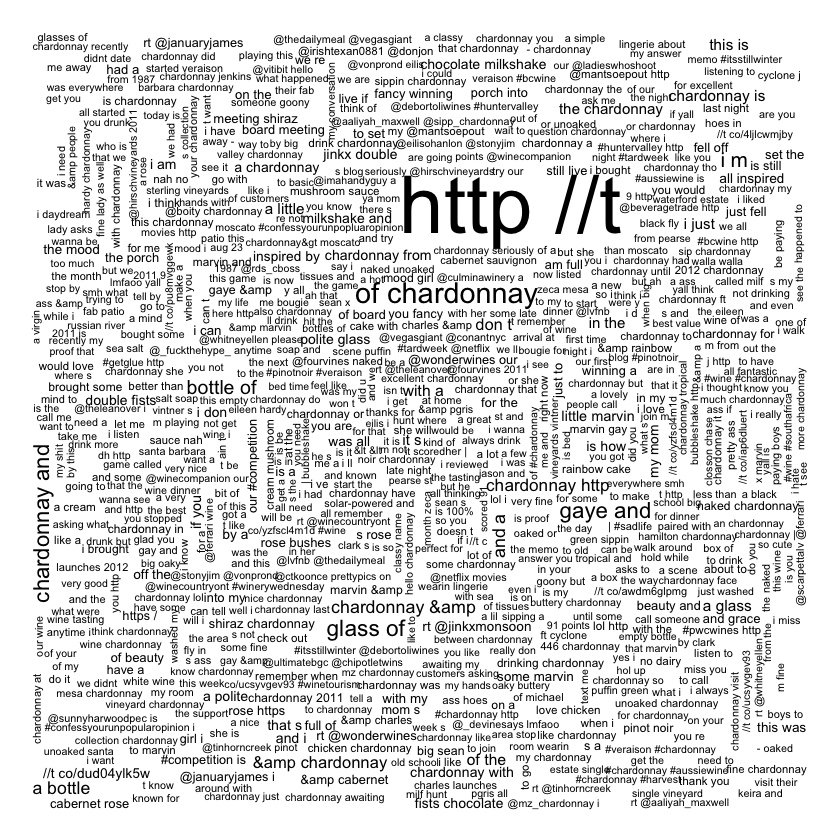

In [96]:
bigram_dtm_m <- as.matrix(bigram_dtm)

# Create freq
freq <- colSums(bigram_dtm_m)

# Create bi_words
bi_words <- names(freq)

# Examine part of bi_words
#print (bi_words[2577:2587])

# Plot a wordcloud
wordcloud(bi_words, freq, min.words=50)

# Varying frequency weights

In [97]:
tf_tdm <- TermDocumentMatrix(text_corp)
tfidf_tdm <- TermDocumentMatrix(text_corp, control=list(weighting=weightTfIdf))

tf_tdm_m <- as.matrix(tf_tdm)
tfidf_tdm_m <- as.matrix(tfidf_tdm) # as matrix

print ("Examining tf_tdm_m")
print (tf_tdm_m[508:509, 5:10])

cat("\n")
print ("Examining tfidf_tdm_m")
print (tfidf_tdm_m[508:509, 5:10])

[1] "Examining tf_tdm_m"
              Docs
Terms          5 6 7 8 9 10
  @eatdccoast: 0 0 0 0 0  0
  @edstanley8  0 0 0 0 0  0

[1] "Examining tfidf_tdm_m"
              Docs
Terms          5 6 7 8 9 10
  @eatdccoast: 0 0 0 0 0  0
  @edstanley8  0 0 0 0 0  0


# Capturing metadata

In [98]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, c(stopwords("en"), "coffee", "mug"))
  return(corpus)
}

In [99]:
tweets_new <- tweets[, c("id", "text", "screenName", "created")] # Selecting specific columns
names(tweets_new)[1] <- "doc_id"

#Preprocessing
docs <- DataframeSource(tweets_new)
text_corpus <- clean_corpus(VCorpus(docs))

print ("Printing the first doc's doc_id")
text_corpus[[1]]$meta$id

print ("Printing the first doc contents")
text_corpus[[1]]$content

print ("Accessing the first doc metadata")
meta(text_corpus[1])

[1] "Printing the first doc's doc_id"


[1] "3.66e+17"

[1] "Printing the first doc contents"


[1] "ayyytylerb    true drink lots  "

[1] "Accessing the first doc metadata"


screenName,created
thejennagibson,08/09/13 2:43
